In [96]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree

cancer_data = load_breast_cancer()

# print features and target (b)
print("(b) features:")
print(cancer_data.feature_names)
print("\nname of target:")
print(cancer_data.target_names)

# allocate data and split (c)
x = cancer_data.data
y = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10)
# print(X_train, X_test)
# print(y_train, y_test)


(b) features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

name of target:
['malignant' 'benign']


In [97]:
# decision tree(g)
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)
svc_model = SVC()
svc_model.fit(x_train, y_train)
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train, y_train)
y_predict = svc_model.predict(x_test)

# accuracy
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.97      0.98        91

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



[Text(0.5, 0.8333333333333334, 'worst perimeter <= 115.35\ngini = 0.469\nsamples = 426\nvalue = [160, 266]'),
 Text(0.25, 0.5, 'worst concave points <= 0.156\ngini = 0.183\nsamples = 294\nvalue = [30, 264]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.102\nsamples = 277\nvalue = [15, 262]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.75, 0.5, 'worst perimeter <= 117.45\ngini = 0.03\nsamples = 132\nvalue = [130, 2]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]')]

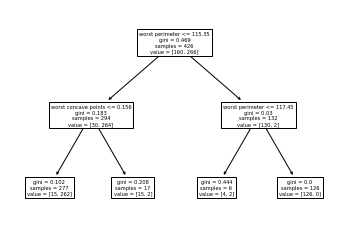

In [98]:
# decision tree (h)
tree.plot_tree(clf, feature_names=cancer_data.feature_names)

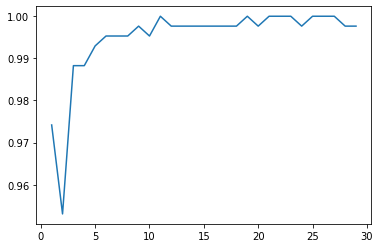

In [99]:
# i bagging
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt


n_est = 30
bagging_score = []
for i in range(1, n_est):
    bag = BaggingClassifier(n_estimators=i)
    bag.fit(x_train, y_train)
    bagging_score.append(bag.score(x_train, y_train))
# print(bagging_score)
n_estimate = list(range(1, n_est))
# print(len(n_estimate))
plt.plot(n_estimate, bagging_score)


x_train
[[-0.60408221 -0.30624914 -0.66228757 ... -1.34634798 -1.23731664
  -0.76362748]
 [-1.12279618 -1.02018025 -1.12834923 ... -1.37974063  1.12995399
  -0.21354299]
 [ 1.70503159  1.83086268  1.63207664 ...  0.83479189  0.43651108
  -0.22529454]
 ...
 [-0.51762988 -1.63111802 -0.54718569 ... -0.13005551  0.36648359
  -0.45305078]
 [-0.09652338 -0.4747837  -0.16351274 ... -0.99118566 -0.90767506
  -0.68248582]
 [ 1.82216055  2.78121033  1.74515919 ...  0.77631629 -0.04684937
  -0.10274265]]

X_train
[[1.203e+01 1.793e+01 7.609e+01 ... 2.796e-02 2.171e-01 7.037e-02]
 [1.017e+01 1.488e+01 6.455e+01 ... 2.579e-02 3.557e-01 8.020e-02]
 [2.031e+01 2.706e+01 1.329e+02 ... 1.697e-01 3.151e-01 7.999e-02]
 ...
 [1.234e+01 1.227e+01 7.894e+01 ... 1.070e-01 3.110e-01 7.592e-02]
 [1.385e+01 1.721e+01 8.844e+01 ... 5.104e-02 2.364e-01 7.182e-02]
 [2.073e+01 3.112e+01 1.357e+02 ... 1.659e-01 2.868e-01 8.218e-02]]


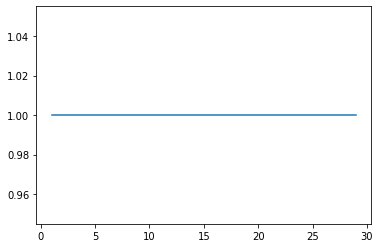

In [105]:
# j AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

n_est = 30
boost_score = []
for i in range(1, n_est):
    ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=n_est)
    ada.fit(x_train, y_train)
    boost_score.append(ada.score(x_train, y_train))

# print(bagging_score)
n_estimate = list(range(1, n_est))
# print(len(n_estimate))
plt.plot(n_estimate, boost_score)


In [101]:
# k random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)